C:\Users\ihlee\anaconda3\envs\testAI\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ihlee\anaconda3\envs\testAI\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\Users\ihlee\anaconda3\envs\testAI\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


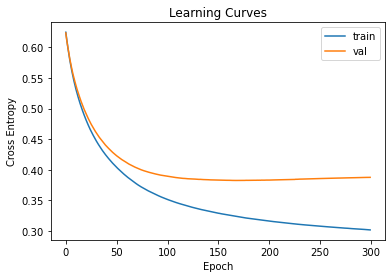

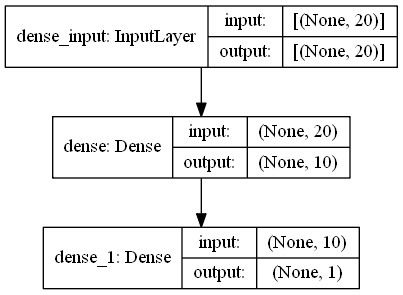

In [1]:
# example of plotting learning curves
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
n_features = X.shape[1]
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')
history = model.fit(X,y, epochs=300,batch_size=32,verbose=0,validation_split=0.3)
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()
plot_model(model,'model.png', show_shapes=True)

In [2]:
#       Binary classification
#       A training program with keras
import time
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np
import random
import tensorflow as tf
np.random.seed(34)
#      fix random seed for reproducibility
#      np.random.seed(7)
#      load pima indians dataset
dataset = np.loadtxt("C:/Users/ihlee/testAI/scikitlearn_keras_examples/pima-indians-diabetes.csv", delimiter=",")
#      split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
X, Y = shuffle(X,Y,random_state=0)
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.2)
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))
for i in range(2):
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, validation_split=0.10, epochs=300, batch_size=5, verbose=2)
#      evaluate the model
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
predictions=model.predict(x_test)
rounded=[round(x[0]) for x in predictions]
print(rounded)
if True:
#      serialize model to JSON
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
#      serialize weights to HDF5
    model.save_weights("model.h5")
    print("Saved model to disk")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 361
Trainable params: 361
Non-trainable params: 0
________________________________________________________

Epoch 71/300
111/111 - 0s - loss: 0.6155 - accuracy: 0.6594 - val_loss: 0.4704 - val_accuracy: 0.8387
Epoch 72/300
111/111 - 0s - loss: 0.6213 - accuracy: 0.6504 - val_loss: 0.4624 - val_accuracy: 0.8548
Epoch 73/300
111/111 - 0s - loss: 0.6039 - accuracy: 0.6920 - val_loss: 0.5091 - val_accuracy: 0.8226
Epoch 74/300
111/111 - 0s - loss: 0.6094 - accuracy: 0.6793 - val_loss: 0.4655 - val_accuracy: 0.8548
Epoch 75/300
111/111 - 0s - loss: 0.6254 - accuracy: 0.6558 - val_loss: 0.4825 - val_accuracy: 0.8548
Epoch 76/300
111/111 - 0s - loss: 0.6138 - accuracy: 0.6685 - val_loss: 0.4580 - val_accuracy: 0.8387
Epoch 77/300
111/111 - 0s - loss: 0.6264 - accuracy: 0.6558 - val_loss: 0.4780 - val_accuracy: 0.8387
Epoch 78/300
111/111 - 0s - loss: 0.6022 - accuracy: 0.6739 - val_loss: 0.4720 - val_accuracy: 0.8226
Epoch 79/300
111/111 - 0s - loss: 0.6177 - accuracy: 0.6594 - val_loss: 0.4591 - val_accuracy: 0.8548
Epoch 80/300
111/111 - 0s - loss: 0.6114 - accuracy: 0.6558 - val_loss: 0.4641 - v

Epoch 151/300
111/111 - 0s - loss: 0.5816 - accuracy: 0.6830 - val_loss: 0.4404 - val_accuracy: 0.8387
Epoch 152/300
111/111 - 0s - loss: 0.5747 - accuracy: 0.6793 - val_loss: 0.4285 - val_accuracy: 0.8548
Epoch 153/300
111/111 - 0s - loss: 0.5890 - accuracy: 0.6793 - val_loss: 0.4370 - val_accuracy: 0.8226
Epoch 154/300
111/111 - 0s - loss: 0.5764 - accuracy: 0.6848 - val_loss: 0.4338 - val_accuracy: 0.8710
Epoch 155/300
111/111 - 0s - loss: 0.6073 - accuracy: 0.6649 - val_loss: 0.4326 - val_accuracy: 0.8387
Epoch 156/300
111/111 - 0s - loss: 0.5871 - accuracy: 0.6866 - val_loss: 0.4678 - val_accuracy: 0.8226
Epoch 157/300
111/111 - 0s - loss: 0.5835 - accuracy: 0.6830 - val_loss: 0.4300 - val_accuracy: 0.8387
Epoch 158/300
111/111 - 0s - loss: 0.5847 - accuracy: 0.6812 - val_loss: 0.4227 - val_accuracy: 0.8548
Epoch 159/300
111/111 - 0s - loss: 0.5596 - accuracy: 0.6830 - val_loss: 0.4410 - val_accuracy: 0.8387
Epoch 160/300
111/111 - 1s - loss: 0.5729 - accuracy: 0.6848 - val_loss: 

Epoch 231/300
111/111 - 0s - loss: 0.5547 - accuracy: 0.6866 - val_loss: 0.4490 - val_accuracy: 0.8710
Epoch 232/300
111/111 - 0s - loss: 0.5592 - accuracy: 0.6884 - val_loss: 0.4249 - val_accuracy: 0.8710
Epoch 233/300
111/111 - 0s - loss: 0.5636 - accuracy: 0.6866 - val_loss: 0.4306 - val_accuracy: 0.8387
Epoch 234/300
111/111 - 0s - loss: 0.5788 - accuracy: 0.6721 - val_loss: 0.4181 - val_accuracy: 0.8387
Epoch 235/300
111/111 - 0s - loss: 0.5659 - accuracy: 0.6902 - val_loss: 0.4327 - val_accuracy: 0.8548
Epoch 236/300
111/111 - 0s - loss: 0.5489 - accuracy: 0.6793 - val_loss: 0.4026 - val_accuracy: 0.8548
Epoch 237/300
111/111 - 0s - loss: 0.5650 - accuracy: 0.6884 - val_loss: 0.4296 - val_accuracy: 0.8548
Epoch 238/300
111/111 - 0s - loss: 0.5585 - accuracy: 0.6812 - val_loss: 0.4468 - val_accuracy: 0.8710
Epoch 239/300
111/111 - 0s - loss: 0.5512 - accuracy: 0.6793 - val_loss: 0.4000 - val_accuracy: 0.8548
Epoch 240/300
111/111 - 0s - loss: 0.5862 - accuracy: 0.6739 - val_loss: 

In [3]:
#      Binary classification
#      A prediction program with keras
from keras.models import model_from_json
from sklearn.utils import shuffle
import time
import numpy as np
import random
import tensorflow as tf
np.random.seed(34)
random.seed(56)
#        fix random seed for reproducibility
#        np.random.seed(7)
#        load pima indians dataset
dataset = np.loadtxt("C:/Users/ihlee/testAI/scikitlearn_keras_examples/pima-indians-diabetes.csv", delimiter=",")
#        split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
X, Y = shuffle(X,Y,random_state=0)
#           load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
#           load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
#           evaluate loaded model on test data
loaded_model.compile(loss='mean_squared_error', optimizer='adam')
predicted = loaded_model.predict(X)
print(predicted)

Loaded model from disk
[[5.57566509e-02]
 [2.00396523e-01]
 [2.78462410e-01]
 [8.91121328e-01]
 [2.87220955e-01]
 [1.42738357e-01]
 [7.44971454e-01]
 [6.25792027e-01]
 [4.37259108e-01]
 [4.39022034e-01]
 [5.64414024e-01]
 [8.69751573e-01]
 [4.37259108e-01]
 [4.39022034e-01]
 [1.94189683e-01]
 [2.63632506e-01]
 [3.20296288e-01]
 [2.52689898e-01]
 [4.37259108e-01]
 [2.25064531e-01]
 [4.37259108e-01]
 [5.63245192e-02]
 [4.37259108e-01]
 [2.46866699e-02]
 [1.64217025e-01]
 [2.01007396e-01]
 [9.16695371e-02]
 [1.57079831e-01]
 [1.58050105e-01]
 [3.74191344e-01]
 [7.17220724e-01]
 [1.59580097e-01]
 [3.19090873e-01]
 [4.39022034e-01]
 [3.85261059e-01]
 [4.37259108e-01]
 [4.58492279e-01]
 [1.75472125e-01]
 [2.15503022e-01]
 [1.64756879e-01]
 [2.19071388e-01]
 [3.44951078e-02]
 [2.38672093e-01]
 [3.86851192e-01]
 [6.46254420e-01]
 [4.37259108e-01]
 [2.95233369e-01]
 [4.39022034e-01]
 [2.83956766e-01]
 [2.29111284e-01]
 [4.37259108e-01]
 [2.46844485e-01]
 [7.03081667e-01]
 [4.37259108e-01]
 [1.3

In [4]:
#       Multi-class classification
#       A training program with keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import time
import random
import numpy as np
import pandas as pd

np.random.seed(34)
random.seed(56)
random.seed(time.time())
df = pd.read_csv('C:/Users/ihlee/testAI/scikitlearn_keras_examples/iris.csv',names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
data_set = df.values
X = data_set[:, 0:4].astype(float)
obj_y = data_set[:, 4]
encoder = LabelEncoder()
encoder.fit(obj_y)
Y_encodered = encoder.transform(obj_y)
Y = np_utils.to_categorical(Y_encodered)
X, Y = shuffle(X,Y,random_state=0)
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.2)
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
for i in range(3):
    model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, validation_split=0.10, epochs=100, batch_size=5, verbose=2)
scores=model.evaluate(x_test, y_test)
print('\nTest: Loss: {:.4f}'.format(scores[0]))
print('\nTest: Accuracy: {:.4f}'.format(scores[1]))
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
if True:
#       serialize model to JSON
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
#       serialize weights to HDF5
    model.save_weights("model.h5")
    print("Saved model to disk")


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 33        
Total params: 503
Trainable params: 503
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
22/22 - 1s - loss: 1.4213 - accuracy: 0.3426 - val_loss: 1.1237 - val_accuracy: 0.4167
Epoch 2/100
22/22 - 0s 

Epoch 73/100
22/22 - 0s - loss: 0.0825 - accuracy: 0.9630 - val_loss: 0.0722 - val_accuracy: 0.9167
Epoch 74/100
22/22 - 0s - loss: 0.0852 - accuracy: 0.9722 - val_loss: 0.0320 - val_accuracy: 1.0000
Epoch 75/100
22/22 - 0s - loss: 0.0812 - accuracy: 0.9630 - val_loss: 0.0395 - val_accuracy: 1.0000
Epoch 76/100
22/22 - 0s - loss: 0.0826 - accuracy: 0.9630 - val_loss: 0.0280 - val_accuracy: 1.0000
Epoch 77/100
22/22 - 0s - loss: 0.0999 - accuracy: 0.9630 - val_loss: 0.0298 - val_accuracy: 1.0000
Epoch 78/100
22/22 - 0s - loss: 0.0992 - accuracy: 0.9444 - val_loss: 0.0270 - val_accuracy: 1.0000
Epoch 79/100
22/22 - 0s - loss: 0.1206 - accuracy: 0.9537 - val_loss: 0.1273 - val_accuracy: 0.9167
Epoch 80/100
22/22 - 0s - loss: 0.1296 - accuracy: 0.9259 - val_loss: 0.0274 - val_accuracy: 1.0000
Epoch 81/100
22/22 - 0s - loss: 0.0894 - accuracy: 0.9537 - val_loss: 0.0328 - val_accuracy: 1.0000
Epoch 82/100
22/22 - 0s - loss: 0.0734 - accuracy: 0.9815 - val_loss: 0.0476 - val_accuracy: 1.0000


In [5]:
#        Multi-class classification
#        A prediction program with keras
from keras.models import model_from_json
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import time
import random
import numpy as np
import pandas as pd

np.random.seed(34)
random.seed(56)

df = pd.read_csv('C:/Users/ihlee/testAI/scikitlearn_keras_examples/iris.csv',names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
data_set = df.values
X = data_set[:, 0:4].astype(float)
obj_y = data_set[:, 4]
encoder = LabelEncoder()
encoder.fit(obj_y)
Y_encodered = encoder.transform(obj_y)
Y = np_utils.to_categorical(Y_encodered)
X, Y = shuffle(X,Y,random_state=0)
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.2)
#         load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
#         load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
#         evaluate loaded model on test data
loaded_model.compile(loss='mean_squared_error', optimizer='adam')
predicted = loaded_model.predict(X)
print(predicted)

Loaded model from disk
[[7.07582402e-08 8.52727983e-03 9.91472602e-01]
 [6.11987256e-04 9.99217153e-01 1.70855987e-04]
 [9.99951363e-01 4.86578501e-05 2.43597464e-16]
 [1.21667396e-08 1.17937373e-02 9.88206208e-01]
 [9.99762595e-01 2.37417422e-04 3.62492527e-14]
 [8.83054074e-09 4.46071196e-03 9.95539248e-01]
 [9.99814570e-01 1.85471756e-04 2.19096456e-14]
 [7.30650718e-05 9.98774588e-01 1.15224568e-03]
 [6.80643789e-05 9.97919261e-01 2.01270264e-03]
 [4.18061769e-04 9.99473870e-01 1.08035900e-04]
 [2.78747621e-07 3.95965204e-02 9.60403204e-01]
 [1.04511018e-04 9.99031305e-01 8.64126603e-04]
 [8.53945385e-05 9.92542148e-01 7.37242308e-03]
 [7.94601656e-05 9.95455980e-01 4.46455646e-03]
 [5.95519050e-05 9.78124499e-01 2.18158755e-02]
 [9.99700546e-01 2.99468986e-04 9.52487397e-14]
 [7.80690534e-05 9.81852710e-01 1.80692598e-02]
 [1.22707861e-04 9.65559363e-01 3.43178995e-02]
 [9.99541402e-01 4.58684022e-04 3.54442224e-13]
 [9.99909878e-01 9.01148160e-05 1.76518913e-15]
 [1.22371304e-07 

regression save

In [6]:
#       Regression 
#       A training program with keras
import time
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import tensorflow as tf
np.random.seed(34)
random.seed(56)
df = pd.read_csv('C:/Users/ihlee/testAI/scikitlearn_keras_examples/housing.csv', delim_whitespace=True, header=None)
data_set = df.values
X = data_set[:, 0:13]
Y = data_set[:, 13]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2)
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')
#model.fit(X_train, Y_train, epochs=200, batch_size=10)
model.fit(X_train, Y_train, validation_split=0.10, epochs=200, batch_size=10, verbose=2)
Y_prediction = model.predict(X_validation).flatten()
for i in range(10):
    real_price = Y_validation[i]
    predicted_price = Y_prediction[i]
    print('Real Price: {:.3f}, Predicted Price: {:.3f}'.format(real_price, predicted_price))
if True:
#        serialize model to JSON
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
#        serialize weights to HDF5
    model.save_weights("model.h5")
    print("Saved model to disk")


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 30)                420       
_________________________________________________________________
dense_12 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 7         
Total params: 1,365
Trainable params: 1,365
Non-trainable params: 0
____________________________________________________

Epoch 119/200
37/37 - 0s - loss: 21.4501 - val_loss: 13.3031
Epoch 120/200
37/37 - 0s - loss: 16.8130 - val_loss: 17.3249
Epoch 121/200
37/37 - 0s - loss: 17.9071 - val_loss: 13.0979
Epoch 122/200
37/37 - 0s - loss: 22.4864 - val_loss: 14.9233
Epoch 123/200
37/37 - 0s - loss: 19.7568 - val_loss: 19.7230
Epoch 124/200
37/37 - 0s - loss: 23.1305 - val_loss: 11.3389
Epoch 125/200
37/37 - 0s - loss: 19.9766 - val_loss: 13.9330
Epoch 126/200
37/37 - 0s - loss: 18.1922 - val_loss: 10.4718
Epoch 127/200
37/37 - 0s - loss: 19.0371 - val_loss: 12.6316
Epoch 128/200
37/37 - 0s - loss: 21.2779 - val_loss: 16.7985
Epoch 129/200
37/37 - 0s - loss: 18.0726 - val_loss: 13.8360
Epoch 130/200
37/37 - 0s - loss: 19.7267 - val_loss: 10.4323
Epoch 131/200
37/37 - 0s - loss: 21.3219 - val_loss: 13.9982
Epoch 132/200
37/37 - 0s - loss: 23.2764 - val_loss: 16.9507
Epoch 133/200
37/37 - 0s - loss: 21.3691 - val_loss: 10.6773
Epoch 134/200
37/37 - 0s - loss: 17.4990 - val_loss: 13.2722
Epoch 135/200
37/37 - 0s

regression load and prediction

In [7]:
#       Regression 
#       A prediction program with keras
from keras.models import model_from_json
from sklearn.utils import shuffle
import time
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import tensorflow as tf
np.random.seed(34)
random.seed(56)
df = pd.read_csv('C:/Users/ihlee/testAI/scikitlearn_keras_examples/housing.csv', delim_whitespace=True, header=None)
data_set = df.values
X = data_set[:, 0:13]
Y = data_set[:, 13]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
if True:
#         load json and create model
    json_file = open('model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
#         load weights into new model
    loaded_model.load_weights("model.h5")
    print("Loaded model from disk")
loaded_model.compile(loss='mean_squared_error', optimizer='adam')
Y_prediction = loaded_model.predict(X_test).flatten()
for i in range(10):
     real_price = Y_test[i]
     predicted_price = Y_prediction[i]
     print('Real Price: {:.3f}, Predicted Price: {:.3f}'.format(real_price, predicted_price))

Loaded model from disk
Real Price: 21.500, Predicted Price: 20.873
Real Price: 50.000, Predicted Price: 44.534
Real Price: 15.200, Predicted Price: 15.717
Real Price: 24.300, Predicted Price: 19.450
Real Price: 25.000, Predicted Price: 16.647
Real Price: 24.800, Predicted Price: 25.033
Real Price: 17.600, Predicted Price: 17.297
Real Price: 13.500, Predicted Price: 9.342
Real Price: 24.800, Predicted Price: 25.774
Real Price: 20.300, Predicted Price: 20.644


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0

4/4 [==============================] - 0s 9ms/step - loss: 0.1654 - accuracy: 0.9750 - val_loss: 0.2257 - val_accuracy: 0.9333
Epoch 42/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1598 - accuracy: 0.9750 - val_loss: 0.2217 - val_accuracy: 0.9333
Epoch 43/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1579 - accuracy: 0.9750 - val_loss: 0.2225 - val_accuracy: 0.9333
Epoch 44/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1508 - accuracy: 0.9750 - val_loss: 0.2020 - val_accuracy: 0.9667
Epoch 45/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1493 - accuracy: 0.9750 - val_loss: 0.1929 - val_accuracy: 0.9667
Epoch 46/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1448 - accuracy: 0.9833 - val_loss: 0.2038 - val_accuracy: 0.9333
Epoch 47/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1407 - accuracy: 0.9750 - val_loss: 0.1956 - val_accuracy: 0.9667
Epoch 48/100
4/4 [=============

4/4 [==============================] - 0s 9ms/step - loss: 0.0841 - accuracy: 0.9750 - val_loss: 0.1096 - val_accuracy: 0.9667
Epoch 100/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0813 - accuracy: 0.9750 - val_loss: 0.0912 - val_accuracy: 0.9667


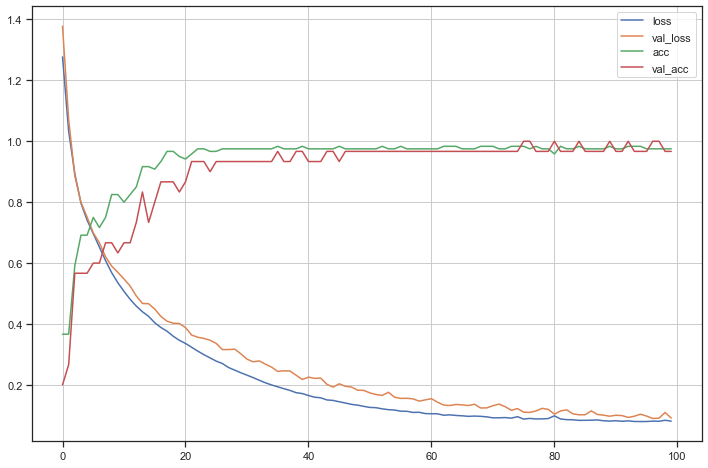

1/1 [==============================] - 0s 17ms/step - loss: 0.0912 - accuracy: 0.9667
Accuracy = 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Predicted target name: ['setosa']
Predicted target name: ['versicolor']


C:\Users\ihlee\anaconda3\envs\testAI\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [8]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species", palette="husl")
iris.info()
iris['species'].unique()
from sklearn.preprocessing import LabelEncoder
X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
print(Y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,  test_size=0.2, random_state=1) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.grid()
plt.show()
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))
test_set = np.array([[5, 2.9, 1, 0.2]])
print("Predicted target name: {}".format(iris['species'].unique()[model.predict_classes(test_set)]))
iris.query("species == 'versicolor'")
test_set = np.array([[7, 3.0, 5, 1.4]])
print("Predicted target name: {}".format(iris['species'].unique()[model.predict_classes(test_set)]))


In [9]:
from keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
# let us view on sample from the features
print(X_train[0], y_train[0])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# first we fit the scaler on the training dataset
scaler.fit(X_train)
# then we call the transform method to scale both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# a sample output
print(X_train_scaled[0])
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(16, activation='relu'))
model.summary()
# output layer
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100)
model.evaluate(X_test_scaled, y_test)
# output
# [26.68399990306181, 3.7581424339144838]
# we get a sample data (the first 2 inputs from the training data)
to_predict = X_train_scaled[:2]
# we call the predict method
predictions = model.predict(to_predict)
# print the predictions
print(predictions)
# output
# array([[13.272537], [39.808475]], dtype=float32)
# print the real values
print(y_train[:2])
# array([15.2, 42.3])


57344/57026 [==============================] - 0s 1us/step
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ] 15.2
[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 8)                 112       
_________________________________________________________________
dense_21 (Dense)             (None, 16)                144       
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
11/11 [==============================] - 1s 17ms/step - loss: 574.8666 - mae: 22.1637 - val_loss: 642.8423 - val_mae: 23.6189
Epoch 2/100
11/11 [=========

11/11 [==============================] - 0s 7ms/step - loss: 43.1404 - mae: 4.6567 - val_loss: 52.5991 - val_mae: 5.4609
Epoch 54/100
11/11 [==============================] - 0s 6ms/step - loss: 41.6087 - mae: 4.5738 - val_loss: 50.0545 - val_mae: 5.3346
Epoch 55/100
11/11 [==============================] - 0s 7ms/step - loss: 39.6724 - mae: 4.4665 - val_loss: 47.6754 - val_mae: 5.2136
Epoch 56/100
11/11 [==============================] - 0s 6ms/step - loss: 38.1465 - mae: 4.3879 - val_loss: 46.0450 - val_mae: 5.0988
Epoch 57/100
11/11 [==============================] - 0s 6ms/step - loss: 36.8183 - mae: 4.3228 - val_loss: 44.1010 - val_mae: 4.9880
Epoch 58/100
11/11 [==============================] - 0s 7ms/step - loss: 35.4116 - mae: 4.2337 - val_loss: 42.3088 - val_mae: 4.8990
Epoch 59/100
11/11 [==============================] - 0s 7ms/step - loss: 34.1543 - mae: 4.1710 - val_loss: 40.6511 - val_mae: 4.7868
Epoch 60/100
11/11 [==============================] - 0s 6ms/step - loss: 3

In [10]:
# mlp for regression
from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(path, header=None)
X, y = df.values[:, :-1], df.values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
n_features = X_train.shape[1]
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
model.summary()
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))
# make a prediction
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 15, saw 5


LSTM  Long Short-Term Memory layer - Hochreiter 1997.
RNN(Recurrent Neural Network, 순환신경망)은 시퀀스 데이터를 모델링 하기 위해 등장
이미지를 텍스트로 설명해주는 모델
글의 번역기와 네이버의 파파고는 RNN을 응용한 모델
RNN 기반 모델은 기존 통계 기반 모델의 비해 우수한 성능
RNN을 통해서 영화 대본을 짜는 실험
시퀀스 입력 & 시퀀스 출력 구조를 갖고 있습니다. 이 구조의 모델을 다른 말로 encoder-decoder 모델
RNN은 히든 노드가 방향을 가진 엣지로 연결돼 순환구조를 이루는(directed cycle) 인공신경망의 한 종류입니다. 음성, 문자 등 순차적으로 등장하는 데이터 처리에 적합한 모델로 알려져 있는데요. Convolutional Neural Networks(CNN)과 더불어 최근 들어 각광 받고 있는 알고리즘입니다.
예컨대 ‘h’의 다음 정답은 ‘e’, ‘e’ 다음은 ‘l’, ‘l’ 다음은 ‘l’, ‘l’ 다음은 ‘o’가 정답입니다.
STM은 RNN의 히든 state에 cell-state를 추가한 구조입니다. 

In [11]:
# lstm for time series forecasting
from numpy import sqrt
from numpy import asarray
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return asarray(X), asarray(y)
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0, index_col=0, squeeze=True)
# retrieve the values
values = df.values.astype('float32')
# specify the window size
n_steps = 5
# split into samples
X, y = split_sequence(values, n_steps)
# reshape into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
# split into train/test
n_test = 12
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_steps,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
model.summary()
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=350, batch_size=32, verbose=2, validation_data=(X_test, y_test))
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))
# make a prediction
row = asarray([18024.0, 16722.0, 14385.0, 21342.0, 17180.0]).reshape((1, n_steps, 1))
yhat = model.predict(row)
print('Predicted: %.3f' % (yhat))

C:\Users\ihlee\AppData\Local\Temp/ipykernel_7144/766703848.py:24: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = read_csv(path, header=0, index_col=0, squeeze=True)


ParserError: Error tokenizing data. C error: Expected 1 fields in line 15, saw 5
